In [12]:


import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
import time
from IPython.display import clear_output



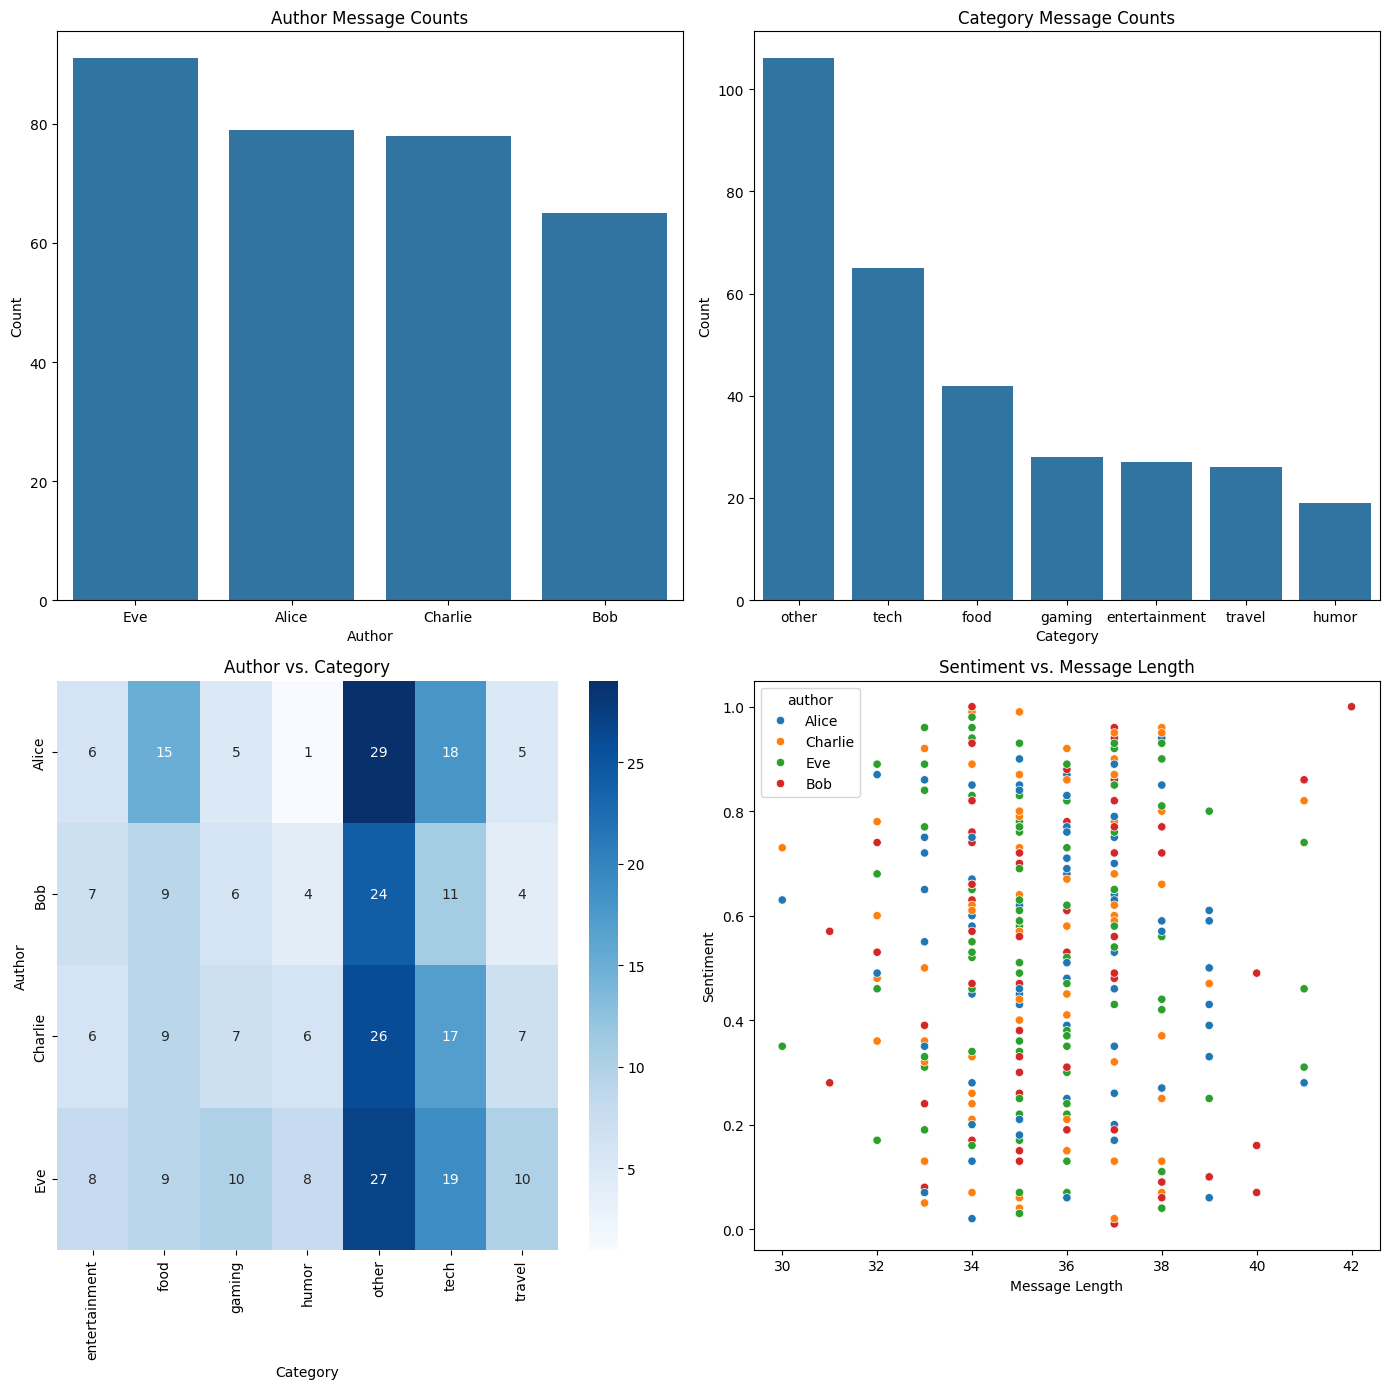

KeyboardInterrupt: 

In [19]:
# Connect to the SQLite database
conn = sql.connect('data/buzzline.db')
print("Connected to the database successfully")

# Function to query the database and update the plots
def update_plots():
    # Query the database
    df = pd.read_sql_query("SELECT * FROM messages", conn)
    
    # Compute some statistics
    contingency_table = pd.crosstab(df['author'], df['category'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

    # Clear the previous output
    clear_output(wait=True)
    
    # Plot the data
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    axes = axes.flatten()
    
    # Plot the author message counts
    author_counts = df['author'].value_counts()
    sns.barplot(x=author_counts.index, y=author_counts.values, ax=axes[0])
    axes[0].set_title('Author Message Counts')
    axes[0].set_xlabel('Author')
    axes[0].set_ylabel('Count')
    
    # Plot the category message counts
    category_counts = df['category'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[1])
    axes[1].set_title('Category Message Counts')
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Count')

    # Plot the contingency table
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title('Author vs. Category')
    axes[2].set_xlabel('Category')
    axes[2].set_ylabel('Author')

    # Scatter plot of sentiment vs word count colored by author
    df['message_length'] = df['message'].apply(len)
    sns.scatterplot(x='message_length', y='sentiment', hue='author', data=df, ax=axes[3])
    axes[3].set_title('Sentiment vs. Message Length')
    axes[3].set_xlabel('Message Length')
    axes[3].set_ylabel('Sentiment')
    
    plt.tight_layout()
    plt.show()

# Loop to continually update the plots
while True:
    update_plots()
    time.sleep(5)  # Update every 5 seconds